In [5]:
import pandas as pd

df_kriter = pd.read_excel("data/Occupational_Risks_Analysis.xlsx")
df_alt = pd.read_excel("data/OHS_Improvement_Suggestions.xlsx")

df_kriter.head(), df_alt.head()


(           Unnamed: 0 Work-related disease risk  \
 0 2025-04-23 14:25:54            Very Important   
 1 2025-04-23 12:22:55                 Important   
 2 2025-04-25 10:59:14               Unimportant   
 3 2025-04-26 16:17:08                 Important   
 4 2025-04-26 19:42:39            Very Important   
 
   Risk of noise-induced hearing loss  \
 0                     Very Important   
 1                          Important   
 2                        Unimportant   
 3  Neither important nor unimportant   
 4                     Very Important   
 
   Risks from natural disasters (e.g. earthquake, flood)  \
 0                                     Very Important      
 1                  Neither important nor unimportant      
 2                                        Unimportant      
 3                                          Important      
 4                                     Very Important      
 
        Risk of exposure to chemicals Machinery and equipment safety risk  \

In [6]:
import numpy as np

linguistic_to_pf = {
    "Very Important": (0.9, 0.05, 0.05),
    "Important": (0.75, 0.15, 0.10),
    "Neither important nor unimportant": (0.5, 0.3, 0.2),
    "Unimportant": (0.3, 0.5, 0.2),
    "Not Important at All": (0.1, 0.8, 0.1)
}

def pf_score(pf):
    return pf[0] - pf[1]


def compute_criteria_weights(df):
    scores = {}
    for col in df.columns[1:]: 
        pf_list = df[col].map(linguistic_to_pf).dropna().tolist()
        if pf_list:
            avg_pf = tuple(np.mean([x[i] for x in pf_list]) for i in range(3))
            scores[col] = pf_score(avg_pf)
    total = sum(scores.values())
    return {k: v / total for k, v in scores.items()} if total > 0 else {}


In [7]:
weights = compute_criteria_weights(df_kriter)
weights


{'Work-related disease risk': np.float64(0.07853982300884955),
 'Risk of noise-induced hearing loss': np.float64(0.06969026548672566),
 'Risks from natural disasters (e.g. earthquake, flood)': np.float64(0.06969026548672566),
 'Risk of exposure to chemicals': np.float64(0.07853982300884955),
 'Machinery and equipment safety risk': np.float64(0.06084070796460176),
 'Psychosocial risks (stress, mobbing, etc.)': np.float64(0.07853982300884955),
 'Risk of ergonomic inconvenience': np.float64(0.10176991150442478),
 'Risk of electrical hazard': np.float64(0.08738938053097345),
 'Possibility of fire': np.float64(0.09292035398230086),
 'Competence in the use of PPE (Personal Protective Equipment)': np.float64(0.10176991150442478),
 'The level of occupational health and safety training of employees': np.float64(0.07853982300884955),
 'Identifying hazards in advance and keeping risk analyses up-to-date': np.float64(0.10176991150442478)}

In [8]:

def compute_alternative_scores(df, weights):
    alt_scores = {}
    for index, row in df.iterrows():
        alt_name = row[0] 
        values = []
        for i, col in enumerate(df.columns[1:]):
            cell = str(row[col]).strip().title()
            pf = linguistic_to_pf.get(cell, (0.5, 0.3, 0.2)) 
            s = pf_score(pf)
            w = list(weights.values())[i] if i < len(weights) else 0
            values.append(s * w)
        alt_scores[alt_name] = sum(values)
    return dict(sorted(alt_scores.items(), key=lambda item: item[1], reverse=True))


In [9]:
alt_scores = compute_alternative_scores(df_alt, weights)
alt_scores


/var/folders/tc/9f8gwqk17s1ftjm1fzxst5_c0000gn/T/ipykernel_79187/1737628023.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alt_name = row[0]


{Timestamp('2025-04-23 14:23:18'): np.float64(0.2),
 Timestamp('2025-04-23 12:59:33'): np.float64(0.2),
 Timestamp('2025-04-25 10:17:41'): np.float64(0.2),
 Timestamp('2025-04-26 16:43:03'): np.float64(0.2),
 Timestamp('2025-04-26 19:03:47'): np.float64(0.2),
 Timestamp('2025-04-28 23:08:55'): np.float64(0.2)}

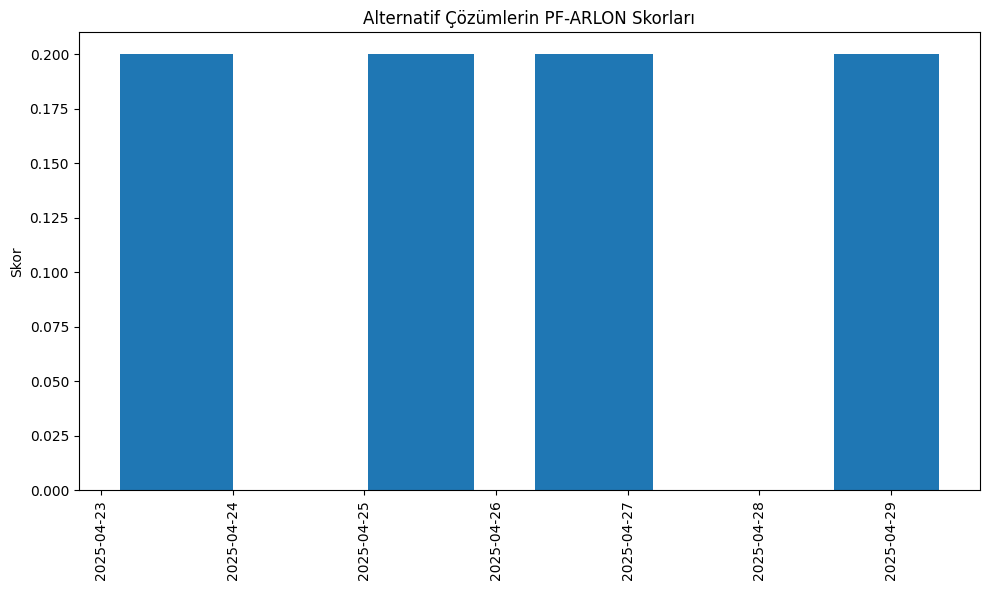

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(alt_scores.keys(), alt_scores.values())
plt.xticks(rotation=90)
plt.title("Alternatif Çözümlerin PF-ARLON Skorları")
plt.ylabel("Skor")
plt.tight_layout()
plt.show()
